## XQ1i interactive UI

This notebook guides the user through the calibration and control of the four qubits (QBs) available with the XQ1i quantum processor:
- QB1: NV electron spin
- QB2: nitrogen ($^{14}$N) nuclear spin
- QB3: carbon ($^{13}$C$_1$) nuclear spin
- QB4: carbon ($^{13}$C$_2$) nuclear spin

The first notebook cell imports the xq1i library (`libxq1i`) along with some other python modules to establish the communication to and initialization of the device. During initialization, the last saved calibration parameters are loaded from the hard drive (contained in the subfolder `calib_params`). In case the loaded calibration parameters are deemed to be outdated, a warning is printed. In such a case re-running the calibration cell is recommended.

In [3]:
import importlib
import libxq1i
importlib.reload(libxq1i)

try:
   pulsed_master_logic
except NameError:
   manager.startModule('logic', 'pulsed_master_logic')

xq1i = libxq1i.xq1i(pulsed_master_logic, pulsed_measurement_logic, sequence_generator_logic)

INFO: loaded calibration parameters from file 'calib_params_20240830_1007.json'


### Calibration cell
The following notebook cell performs the calibration of the qubits in the system by determining the resonance frequencies of the relevant state transitions and their driving periods.

In [4]:
# calibration of QB1
xq1i.qb1_calibration()

performing calibration of QB1 ...


 ... pulsedODMR:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240830_1139.json'


In [5]:
# calibration of QB2 (either "partial" [no DDRF calib] or "full" [including DDRF calib])
xq1i.qb2_calibration(type='partial')

performing calibration of QB2 ...


 ... nucspect:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucrabi:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucspect:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucrabi:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240830_1248.json'


performing calibration of QB3 ...


 ... xy8_tau:   0%|          | 0/30000.0 [00:00<?, ?sweeps/s]

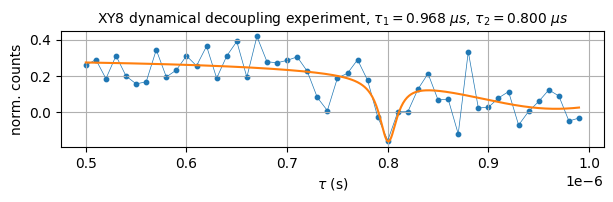

 ... xy8_tau:   0%|          | 0/30000.0 [00:00<?, ?sweeps/s]

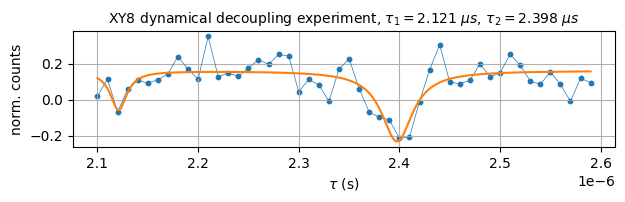

INFO: saved updated calibration parameters to file 'calib_params_20240806_1026.json'


In [4]:
# calibration of QB3
xq1i.qb3_calibration()

In [ ]:
# calibration of QB4
xq1i.qb4_calibration()

### Example 1: execution of a two-qubit circuit
The next cell defines a quantum circuit for a calibrated two-qubit system (consisting of QB1 and QB2), executes it, and outputs the measured final populations of the four computational basis states. The measurement results are saved into the subfolder `measurement_results`.

The computational basis states are:
- `00`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N}$
- `01`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N}$
- `10`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N}$
- `11`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N}$

Any of the computational basis states can be chosen as the initial state of the circuit.

The quantum circuit is defined as a list of native gates. Each gate of the circuit takes the following parameters:
- gate name
- qubit acted upon
- optional gate parameter (only relvant for some gates, see list of native gates below)

The following native gates are available:
- `sx(n)`: $\sqrt{X}$, performs a $\pi/2$ rotation on qubit $n$ (with $n \in \{1,2\}$) along the x-axis of the Bloch sphere
- `sy(n)`: $\sqrt{Y}$, performs a $\pi/2$ rotation on qubit $n$ (with $n \in \{1\}$) along the y-axis of the Bloch sphere
- `rz(n)[theta]`: $R_z(\theta)$, performs a rotation by angle $\theta$ along the z-axis on qubit $n$ (with $n \in \{1,2\}$), where $\theta$ is provided as optional gate parameter (unit: degrees)
- `noop[t_delay]`: delays the execution of all subsequent gates in the circuit by a duration $t_\mathrm{delay} \geq 0$, where $t_\mathrm{delay}$ is provided as optional gate parameter (unit: seconds)
- `c0x(n)`: controlled NOT of qubit $n$ (with $n \in \{1,2\}$) if the control qubit $c$ (with $c=2$ if $n=1$, and vice versa) is in state 0
- `c1x(n)`: controlled NOT of qubit $n$ (with $n \in \{2\}$) if the control qubit $c$ (with $c \in \{1\}$) is in state 1

performing calibration of QB1 ...


 ... pulsedODMR:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240830_1335.json'
running readout circuit 1 of 4 ...


 ... quantumcircuitQB12:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

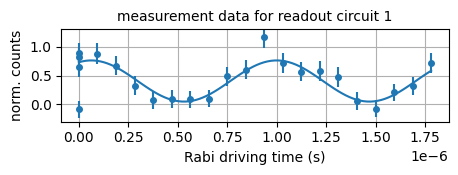

running readout circuit 2 of 4 ...


 ... quantumcircuitQB12:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

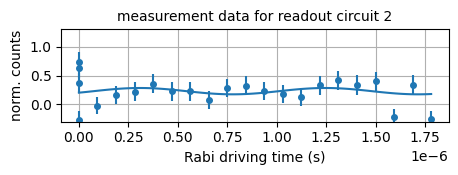

running readout circuit 3 of 4 ...


 ... quantumcircuitQB12:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

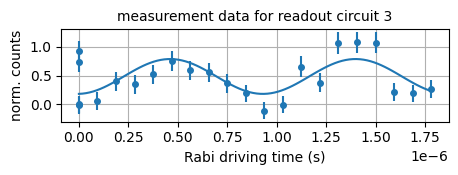

running readout circuit 4 of 4 ...


 ... quantumcircuitQB12:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

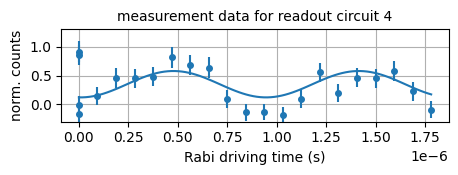

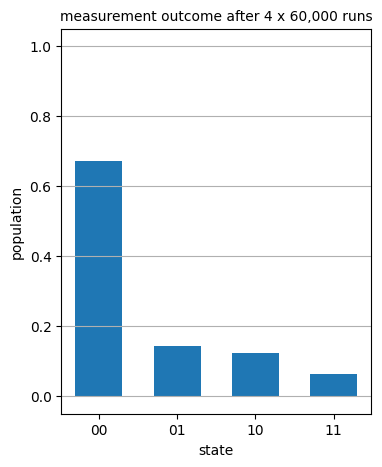

In [6]:
for iSt in [libxq1i.TQstates.State00]:
    xq1i.qb1_calibration()
    sweeps = 60e3
    initState = iSt
    #initState = libxq1i.TQstates.State00
    qcQB12 = [
        #xq1i.gate("sx", 1),
        #xq1i.gate("sx", 2),
        #xq1i.gate("c0x", 2),xq1i_notebook.ipynb
        #xq1i.gate("c0x", 1),
    ]
    xq1i.run_quantum_circuit(ciruit=qcQB12, initState=initState, sweeps=sweeps)

### Example 2: execution of a three-qubit circuit
The next cell defines a quantum circuit for a calibrated three-qubit system (QB1, QB2, QB3), executes it, and outputs the measured final populations of the eight computational basis states. The measurement results are saved into the subfolder `measurement_results`.

The computational basis states are in this case:
- `000`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1}$
- `001`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1}$
- `010`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1}$
- `011`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1}$
- `100`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1}$
- `101`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1}$
- `110`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1}$
- `111`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1}$

The gate set listed above for the two-qubit example is now extended by the following three additional gates:
- `sx(3)`: $\sqrt{X}$, performs a $\pi/2$ rotation on QB3 along the x-axis of the Bloch sphere
- `rz(3)[theta]`: $R_z(\theta)$, performs a rotation by angle $\theta$ along the z-axis on QB3
- `crotx(3)`: $|0\rangle\langle 0|^{(c)} \otimes R_x^{(n)}\left(\frac{\pi}{2}\right) + |1\rangle\langle 1|^{(c)} \otimes R_x^{(n)}\left(-\frac{\pi}{2}\right)$, conditional rotation of QB3 ($n \in \{3\}$), with QB1 being the control qubit ($c \in \{1\}$)

In [ ]:
sweeps = 50e3
initState = libxq1i.ThrQstates.State000
qcQB123 = [
    xq1i.gate("sx", 1),
    xq1i.gate("sx", 2),
    xq1i.gate("c0x", 2),
    xq1i.gate("sx", 3),
    xq1i.gate("rz", 3, 45),
    xq1i.gate("crotx", 3),
]
xq1i.run_quantum_circuit(ciruit=qcQB123, initState=initState, sweeps=sweeps)

### Example 3: execution of a four-qubit circuit
The next cell defines a quantum circuit for a calibrated four-qubit system (QB1, QB2, QB3, QB4), executes it, and outputs the measured final populations of the sixteen computational basis states. The measurement results are saved into the subfolder `measurement_results`.

The computational basis states are in this case:
- `0000`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `0001`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `0010`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `0011`: $|0\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `0100`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `0101`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `0110`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `0111`: $|0\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `1000`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `1001`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `1010`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `1011`: $|1\rangle_\textrm{el} \otimes |0\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `1100`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `1101`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |0\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$
- `1110`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |0\rangle_{\textrm{13C}_2}$
- `1111`: $|1\rangle_\textrm{el} \otimes |1\rangle_\textrm{14N} \otimes |1\rangle_{\textrm{13C}_1} \otimes |1\rangle_{\textrm{13C}_2}$

The gate set listed above for the three-qubit example is again extended by the following three additional gates:
- `sx(4)`: $\sqrt{X}$, performs a $\pi/2$ rotation on QB4 along the x-axis of the Bloch sphere
- `rz(4)[theta]`: $R_z(\theta)$, performs a rotation by angle $\theta$ along the z-axis on QB4
- `crotx(4)`: $|0\rangle\langle 0|^{(c)} \otimes R_x^{(n)}\left(\frac{\pi}{2}\right) + |1\rangle\langle 1|^{(c)} \otimes R_x^{(n)}\left(-\frac{\pi}{2}\right)$, conditional rotation of QB4 ($n \in \{4\}$), with QB1 being the control qubit ($c \in \{1\}$)

In [ ]:
sweeps = 50e3
initState = libxq1i.FourQstates.State0000
qcQB1234 = [
    xq1i.gate("sx", 1),
    xq1i.gate("sx", 2),
    xq1i.gate("c0x", 2),
    xq1i.gate("sx", 3),
    xq1i.gate("rz", 3, 45),
    xq1i.gate("crotx", 3),
    xq1i.gate("sx", 4)
]
xq1i.run_quantum_circuit(ciruit=qcQB1234, initState=initState, sweeps=sweeps)

### Example 4: execution of a two-qubit circuit with QST on the final state
The next cell defines a quantum circuit for a calibrated two-qubit system (consisting of QB1 and QB3), executes it, and performs a full QST of the final state. This is achieved by measuing the expectation values of all operators forming the Pauli basis $A_m \otimes A_n$ for the two-qubit system:
$$ \rho = \frac{1}{4} \sum_{m,n=1}^4 c_{m,n} A_m \otimes A_n \;,$$
where $c_{m,n} = \text{Tr}[\rho(A_m \otimes A_n)]$
are the expectation values to be measured ($c_{1,1} = 1$ due to normalization, resulting in $16-1=15$ measurements). After sequentially measuring the $15$ expectation values, the reconstructed density matrix $\rho$ is plotted and saved into the subfolder `measurement_results`. The definition of the quantum circuit works in a manner analogous to the previous examples.

In [ ]:
sweeps = 60e3
initState = libxq1i.TQstates.State00
qcQB13 = [
    xq1i.gate("crotx", 3),
    xq1i.gate("sx", 1),
    xq1i.gate("crotx", 3)
]
xq1i.run_quantum_circuit_qst(ciruit=qcQB13, initState=initState, sweeps=sweeps)

### Example 5: preparation of a three-qubit GHZ state 
The next cell defines a quantum circuit for preparing a GHZ state on a calibrated three-qubit system (consisting of QB1, QB2, and QB3), executes it, and outputs the measured final populations of the eight computational basis states. The measurement results are saved into the subfolder `measurement_results`. The circuit prepares the following GHZ state:
$$|\Psi_\mathrm{GHZ}\rangle =  \frac{-i}{\sqrt{2}} \left( |000\rangle + |111\rangle \right)$$

performing calibration of QB1 ...


 ... pulsedODMR:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240806_1044.json'
running readout circuit 1 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

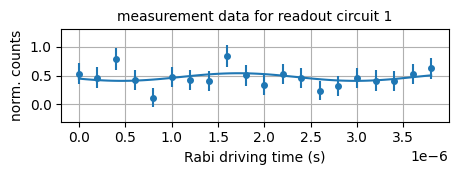

running readout circuit 2 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

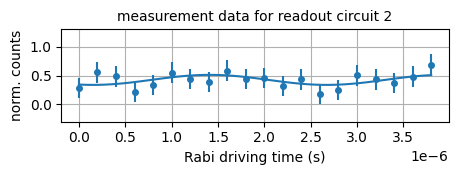

running readout circuit 3 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

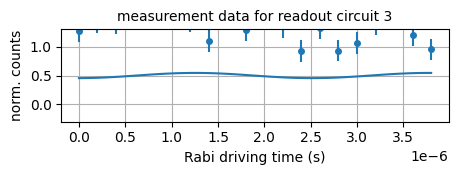

running readout circuit 4 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

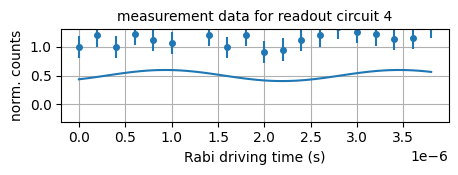

running readout circuit 5 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

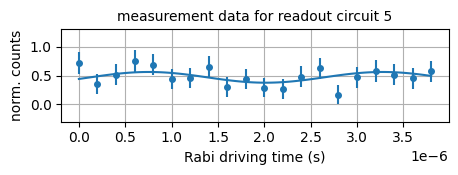

running readout circuit 6 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

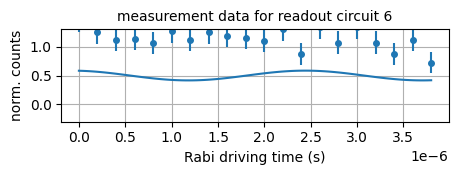

running readout circuit 7 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

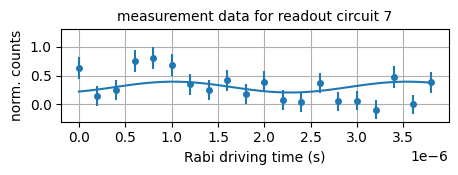

running readout circuit 8 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

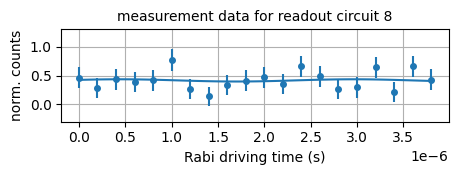

running readout circuit 9 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

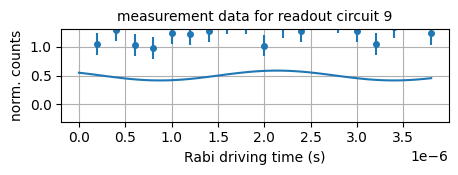

running readout circuit 10 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

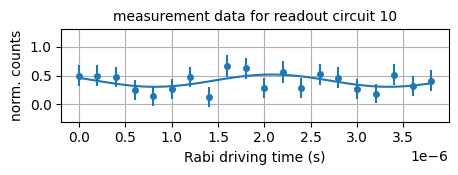

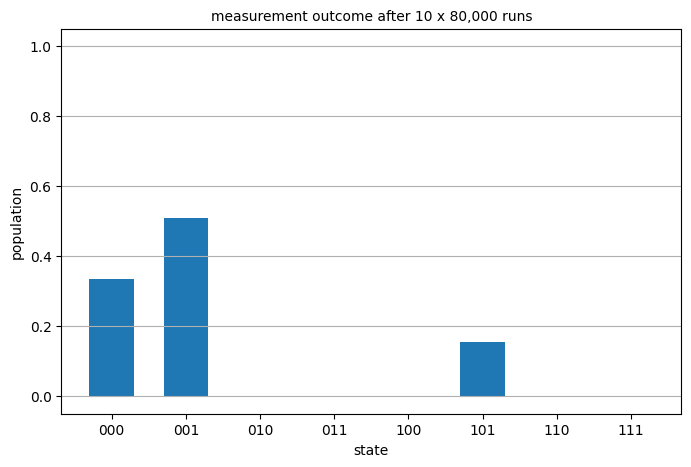

In [5]:
xq1i.qb1_calibration()
sweeps = 80e3
initState = libxq1i.ThrQstates.State000
qcQB123_GHZ = [
    xq1i.gate("noop", 1, 0)
    # xq1i.gate("rz", 1, 180),
    # xq1i.gate("sy", 1),
    # xq1i.gate("c0x", 2),
    # xq1i.gate("rz", 1, 45),
    # xq1i.gate("crotx", 3),
    # xq1i.gate("sx", 3),
    # xq1i.gate("rz", 1, 45),
]
xq1i.run_quantum_circuit(ciruit=qcQB123_GHZ, initState=initState, sweeps=sweeps)

performing calibration of QB1 ...


 ... pulsedODMR:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240806_1247.json'
running readout circuit 1 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

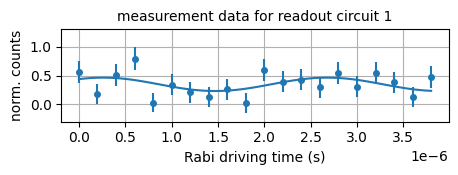

running readout circuit 2 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

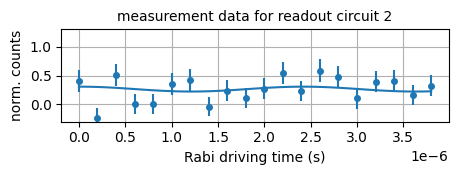

running readout circuit 3 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

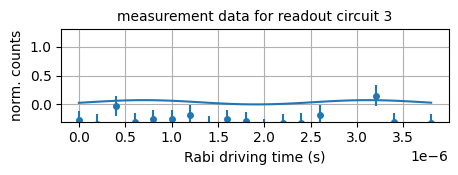

running readout circuit 4 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

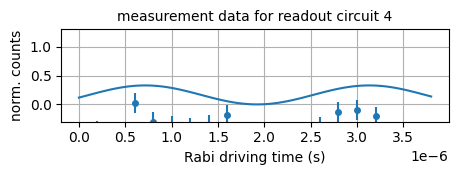

running readout circuit 5 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

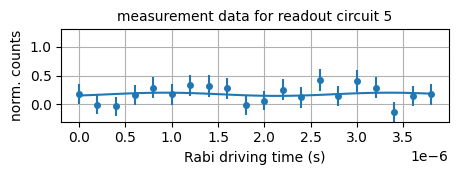

running readout circuit 6 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

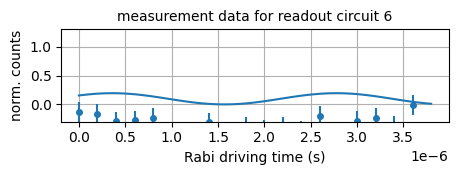

running readout circuit 7 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

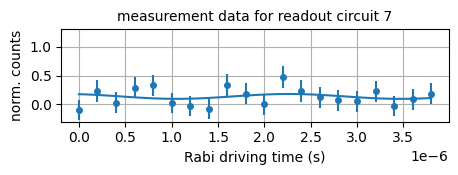

running readout circuit 8 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

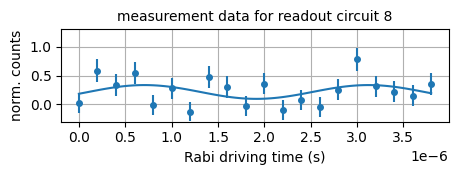

running readout circuit 9 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

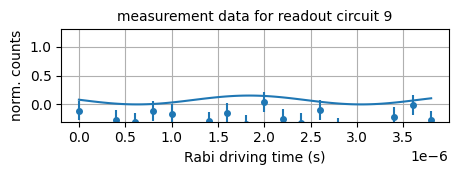

running readout circuit 10 of 10 ...


 ... quantumcircuitQB123:   0%|          | 0/80000.0 [00:00<?, ?sweeps/s]

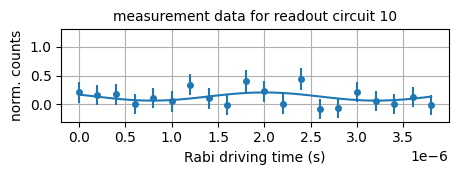

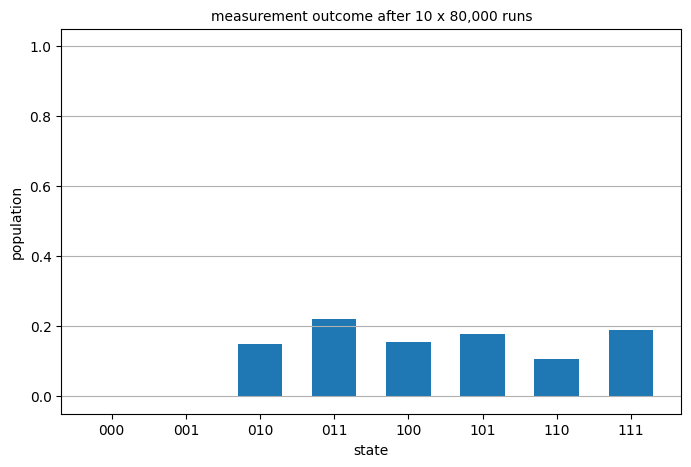

In [6]:
xq1i.qb1_calibration()
sweeps = 80e3
initState = libxq1i.ThrQstates.State111
qcQB123_GHZ = [
    xq1i.gate("noop", 1, 0)
    # xq1i.gate("rz", 1, 180),
    # xq1i.gate("sy", 1),
    # xq1i.gate("c0x", 2),
    # xq1i.gate("rz", 1, 45),
    # xq1i.gate("crotx", 3),
    # xq1i.gate("sx", 3),
    # xq1i.gate("rz", 1, 45),
]
xq1i.run_quantum_circuit(ciruit=qcQB123_GHZ, initState=initState, sweeps=sweeps)

In [120]:
import time
from datetime import datetime

temperatureRecordStartTime = "20240812_1129"
temperatureDataFile = f"log_temperature_{temperatureRecordStartTime}.txt"

startTimestamp = datetime.now()
odmrDataFile = f"log_temp_odmrFreq_{datetime.strftime(startTimestamp, '%Y%m%d_%H%M')}.txt"
odmrFile = open(odmrDataFile, 'w')
                    
repeatCnt = 30
print(f"running ODMR in a loop for a total of {repeatCnt} times ...")
print("# run\t time (mins after start)\t temperature (degrees Celcius)\t resonance frequency (kHz)")
t_start = time.time()
for i in range(repeatCnt):
    xq1i.do_pulsedODMR()
    time.sleep(2)
    result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
    odmr_freq = float(result_dict.params['center'].value)
    odmr_freq_stderr = float(result_dict.params['center'].stderr)
    odmr_fwhm = float(result_dict.params['sigma'].value)
    odmr_fwhm_stderr = float(result_dict.params['sigma'].stderr)
    tempFile = open(temperatureDataFile, 'r')
    temp = tempFile.readlines()[-1].split()[1]
    tempFile.close()
    timeStamp = time.time() - t_start
    odmrFile.write(f"{timeStamp:.0f}\t{odmr_freq/1000:.0f}\t{odmr_freq_stderr/1000:.0f}\t{odmr_fwhm/1000:.0f}\t{odmr_fwhm_stderr/1000:.0f}\n")
    odmrFile.flush()
    print(f"{i+1}\t{(timeStamp/60):.2f}\t {temp}\t {odmr_freq/1000:.0f}")
    time.sleep(60*3)
print("... loop finished")

odmrFile.close()

running ODMR in a loop for a total of 30 times ...
# run	 time (mins after start)	 temperature (degrees Celcius)	 resonance frequency (kHz)


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

1	7.90	 30.50	 1448572


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

2	18.62	 30.58	 1448800


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

3	29.44	 30.66	 1448757


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

4	40.16	 30.61	 1448915


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

5	50.89	 30.15	 1449012


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

6	61.71	 29.96	 1448922


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

7	72.37	 29.97	 1448676


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

8	83.13	 30.12	 1448613


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

9	93.94	 30.28	 1448774


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

10	104.66	 30.32	 1448772


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

11	115.40	 30.41	 1448630


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

12	126.15	 30.42	 1448798


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

13	136.89	 30.48	 1448745


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

14	147.64	 30.50	 1448849


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

15	158.38	 30.54	 1448871


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

16	169.12	 30.56	 1448920


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

17	179.86	 30.61	 1448965


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

18	190.61	 30.63	 1449007


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

19	201.29	 30.61	 1449133


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

20	212.04	 30.30	 1449093


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

21	222.77	 29.95	 1448988


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

22	233.50	 29.92	 1448958


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

23	244.32	 30.02	 1448787


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

24	255.05	 30.15	 1448777


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

25	265.77	 30.17	 1448831


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

26	276.50	 30.26	 1448644


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

27	287.25	 30.33	 1448725


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

28	297.98	 30.37	 1448639


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

29	308.74	 30.43	 1448747


 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

30	319.55	 30.43	 1448867
... loop finished


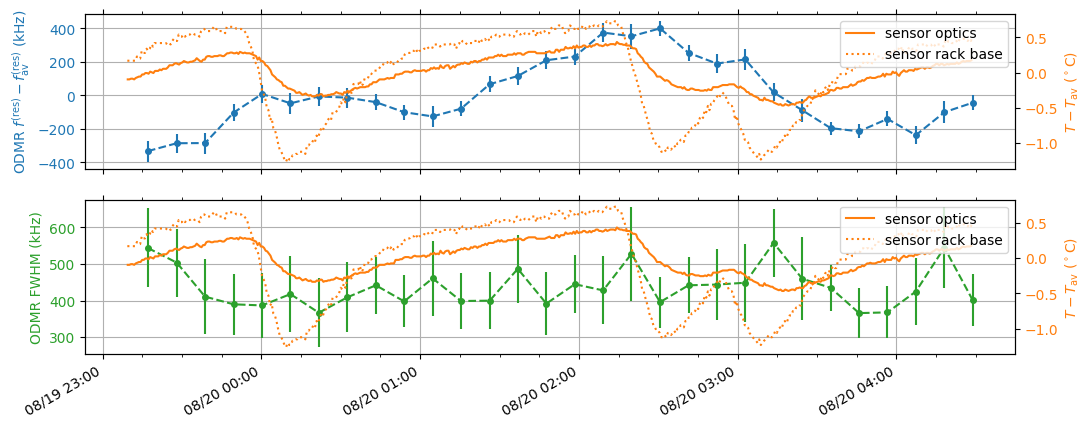

In [125]:
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

temperatureRecordStartTime = "20240812_1129"
temperatureDataFile = f"log_temperature_{temperatureRecordStartTime}.txt"
temperatureRecordStartTimeStamp = datetime.strptime(temperatureRecordStartTime, "%Y%m%d_%H%M")

odmrRecordStartTime = "20240819_2309"
#odmrRecordStartTime = "20240820_1910"
odmrDataFile = f"log_temp_odmrFreq_{odmrRecordStartTime}.txt"
odmrRecordStartTimeStamp = datetime.strptime(odmrRecordStartTime, "%Y%m%d_%H%M")

odmrCols = [r"$f^\mathrm{{(res)}} - f^\mathrm{{(res)}}_\mathrm{{av}}$", "FWHM"]
odmrColors = ['tab:blue', 'tab:green']
odmrData = {"timestamp": []}
for col in odmrCols:
    odmrData[col] = []
    odmrData[col + "_std"] = []
odmrFile = open(odmrDataFile, 'r')
for line in odmrFile:
    vals = line.split()
    odmrData["timestamp"].append( odmrRecordStartTimeStamp + timedelta(seconds = float(vals[0])) )
    for ind, col in enumerate(odmrCols):
        odmrData[col].append( float(vals[1+2*ind]) )
        odmrData[col + "_std"].append( float(vals[2+2*ind]) )
odmrFile.close()

tempCols = ["sensor optics", "sensor rack base"]
tempColors = ['tab:orange', 'tab:orange']
tempLineStyles = ['solid', 'dotted']
temperatureData = {dataCol: {"timestamp": [], "temp": []} for dataCol in tempCols}
temperatureFile = open(temperatureDataFile)
for line in temperatureFile.readlines():
    vals = line.split()
    for ind, dataCol in enumerate(tempCols):
        timeStamp = temperatureRecordStartTimeStamp + timedelta(seconds = float(vals[2*ind]))
        if timeStamp >= odmrRecordStartTimeStamp and timeStamp <= odmrData["timestamp"][-1]:
            temperatureData[dataCol]["timestamp"].append( timeStamp )
            temperatureData[dataCol]["temp"].append( float(vals[2*ind+1]) )
        
odmrData[odmrCols[0]] = np.array(odmrData[odmrCols[0]]) - np.average(odmrData[odmrCols[0]])
fig, axs = plt.subplots( len(odmrCols), 1, figsize=(12, 5), sharex=True )
for ax, odmrCol, odmrColor in zip(axs, odmrCols, odmrColors):
    ax.errorbar(odmrData['timestamp'], odmrData[odmrCol], yerr=odmrData[odmrCol + "_std"], fmt='o', markersize=4, color=odmrColor)
    ax.plot(odmrData['timestamp'], odmrData[odmrCol], color=odmrColor, linestyle='dashed')
    ax.set_ylabel(f'ODMR {odmrCol} (kHz)', color=odmrColor)
    ax.tick_params(axis='y', labelcolor=odmrColor)
    ax.xaxis.set_ticks_position('both')
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1/24/4))
    ax.grid()
    ax1 = ax.twinx()
    for dataCol, tempColor, tempLineStyle in zip(tempCols, tempColors, tempLineStyles):
        temperatureData[dataCol]["temp"] = np.array(temperatureData[dataCol]["temp"]) - np.average(temperatureData[dataCol]["temp"]) 
        ax1.plot(temperatureData[dataCol]["timestamp"], temperatureData[dataCol]["temp"], color=tempColor, linestyle=tempLineStyle, label=dataCol)
        ax1.tick_params(axis='y', labelcolor=tempColor)
        ax1.set_ylabel(rf"$T-T_\mathrm{{av}}$ ($^\circ\mathrm{{C}}$)", color=tempColor)
    ax1.legend(loc='upper right', markerscale=10)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
plt.gcf().autofmt_xdate()
plt.savefig(f"plot_temp_odmrFreq_{odmrRecordStartTime}.pdf", bbox_inches = 'tight')
plt.show()

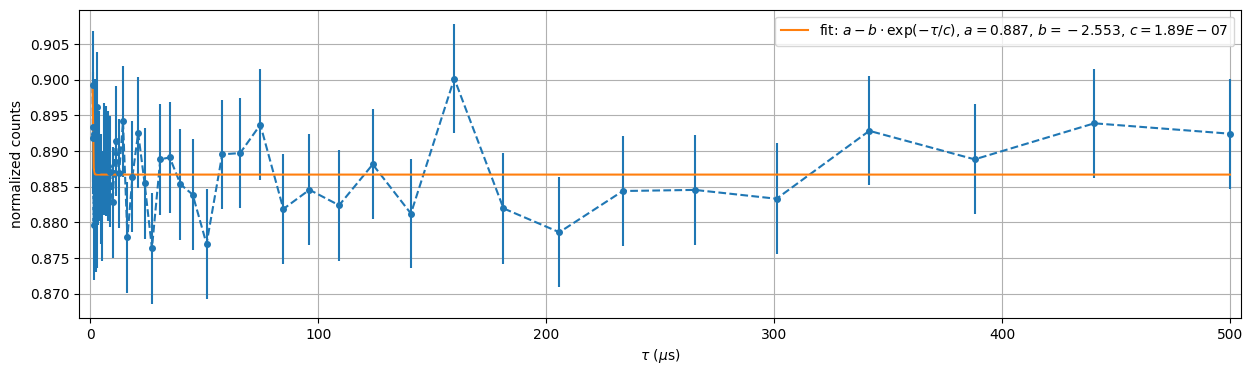

In [90]:
from qudi.util.network import netobtain
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

tData = netobtain(pulsed_measurement_logic.signal_data[0])
sigData = netobtain(pulsed_measurement_logic.signal_data[2])
errData = netobtain(pulsed_measurement_logic.measurement_error[1])

fit_func = lambda t, *p: p[0] - p[1]*np.exp( -t/p[2] )
p0 = [max(sigData), max(sigData)-min(sigData) , 10e-6]
fitparams, fitparams_covariance = optimize.curve_fit(fit_func, tData, sigData, p0=p0, maxfev=1000)

plt.figure(figsize=(15,4))
plt.errorbar(tData*1e6, sigData, yerr=errData, fmt='o', markersize=4)
plt.plot(tData*1e6, sigData, linestyle='dashed', color='tab:blue')
tGrid = np.linspace( tData[0], tData[-1], 1000)
plt.xlim((-5, tData[-1]*1e6+5))
plt.xlabel(r'$\tau$ ($\mu$s)')
plt.ylabel(r'normalized counts')
plt.grid()
plt.plot( tGrid*1e6, fit_func(tGrid, *fitparams), label=rf'fit: $a - b\cdot \exp(-\tau/c)$, $a={fitparams[0]:.3f}$, $b={fitparams[1]:.3f}$, $c={fitparams[2]:.2E}$')
plt.legend()
plt.savefig(f"plot_laserSaturation_darkState_20240822.pdf", bbox_inches = 'tight')
plt.show()

In [17]:
xq1i.selecive_nucrabi()

 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucspect:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucrabi:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240825_1423.json'


In [112]:
import time

xq1i.generate_params['microwave_frequency'] = xq1i.calib_params['res_freq']
xq1i.pulsedODMR_params['freq_start'] = xq1i.calib_params['res_freq'] - 5.0e6
xq1i.pulsedODMR_params['freq_step'] = 0.2e6
xq1i.do_pulsedODMR()
time.sleep(2)
result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
xq1i.calib_params['res_freq'] = float(result_dict.params['center'].value)

 ... pulsedODMR:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

In [79]:
xq1i.qb1_calibration()
xq1i.qb2_calibration()

performing calibration of QB1 ...


 ... pulsedODMR:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240829_1419.json'
performing calibration of QB2 ...


 ... nucspect:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucrabi:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucspect:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

 ... nucrabi:   0%|          | 0/80000 [00:00<?, ?sweeps/s]

INFO: saved updated calibration parameters to file 'calib_params_20240829_1528.json'


In [51]:
import time
from datetime import datetime

startTimestamp = datetime.now()
rabiDataFile = f"log_rabiparams_{datetime.strftime(startTimestamp, '%Y%m%d_%H%M')}.txt"
rabiFile = open(rabiDataFile, 'w')


repeatCnt = 20
print(f"running Rabi calibration in a loop for a total of {repeatCnt} times ...")
t_start = time.time()
for i in range(repeatCnt):
    print(f'starting run {i} ...')
    
    xq1i.generate_params['microwave_frequency'] = xq1i.calib_params['res_freq']
    xq1i.pulsedODMR_params['freq_start'] = xq1i.calib_params['res_freq'] - 5.0e6
    xq1i.pulsedODMR_params['freq_step'] = 0.2e6
    xq1i.pulsedODMR_sweeps = 60e3
    xq1i.do_pulsedODMR()
    result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
    xq1i.calib_params['res_freq'] = float(result_dict.params['center'].value)

    xq1i.rabi_sweeps = 60e3
    xq1i.do_rabi(isSlow=True)  # perform slow Rabi
    result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
    timeStamp = time.time() - t_start
    rabiFile.write(f'{timeStamp:.0f}\t')
    for param in ['frequency', 'offset', 'amplitude']:
        rabiFile.write( f'{float(result_dict.params[param].value):.9e}\t' )
        rabiFile.write( f'{float(result_dict.params[param].stderr):9e}\t' )
    rabiFile.write('\n')
    rabiFile.flush()
    time.sleep(30)
print("... loop finished")

rabiFile.close()

running Rabi calibration in a loop for a total of 20 times ...
starting run 0 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 1 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 2 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 3 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 4 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 5 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 6 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 7 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 8 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 9 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 10 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 11 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 12 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 13 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 14 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 15 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 16 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 17 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 18 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

starting run 19 ...


 ... pulsedODMR:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

 ... rabi:   0%|          | 0/60000.0 [00:00<?, ?sweeps/s]

... loop finished


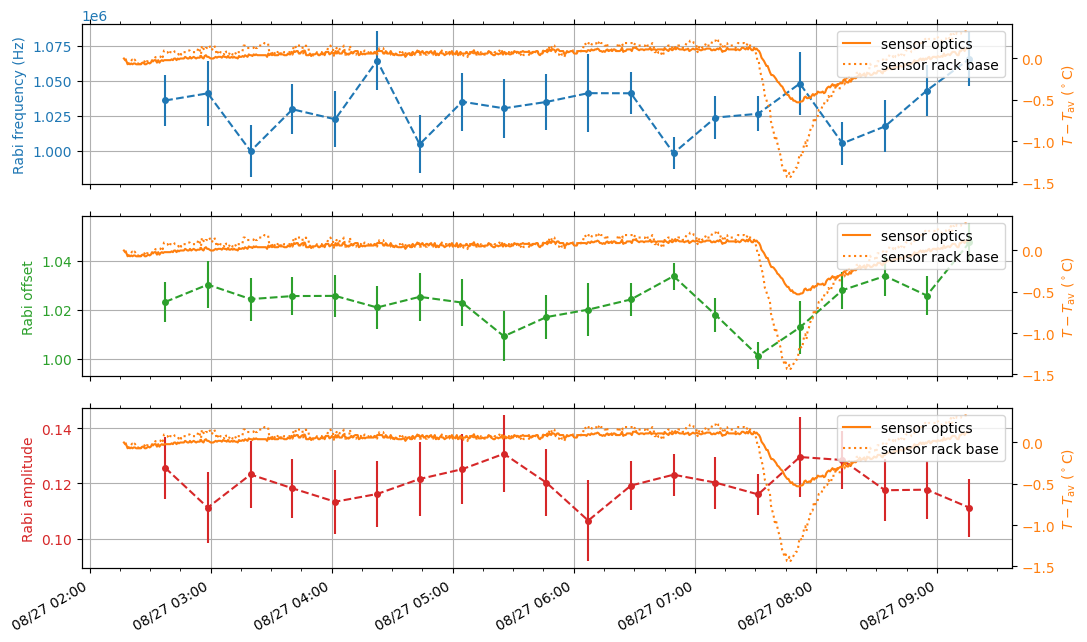

In [55]:
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

temperatureRecordStartTime = "20240812_1129"
temperatureDataFile = f"log_temperature_{temperatureRecordStartTime}.txt"
temperatureRecordStartTimeStamp = datetime.strptime(temperatureRecordStartTime, "%Y%m%d_%H%M")

rabiRecordStartTime = "20240827_0217"
rabiDataFile = f"log_rabiparams_{rabiRecordStartTime}.txt"
rabiRecordStartTimeStamp = datetime.strptime(rabiRecordStartTime, "%Y%m%d_%H%M")

rabiCols = ["frequency (Hz)", "offset", "amplitude"]
rabiColors = ['tab:blue', 'tab:green', 'tab:red']
rabiData = {"timestamp": []}
for col in rabiCols:
    rabiData[col] = []
    rabiData[col + "_std"] = []
rabiFile = open(rabiDataFile, 'r')
for line in rabiFile:
    vals = line.split()
    rabiData["timestamp"].append( rabiRecordStartTimeStamp + timedelta(seconds = float(vals[0])) )
    for ind, col in enumerate(rabiCols):
        rabiData[col].append( float(vals[1+2*ind]) )
        rabiData[col + "_std"].append( float(vals[2+2*ind]) )
rabiFile.close()

tempCols = ["sensor optics", "sensor rack base"]
tempColors = ['tab:orange', 'tab:orange']
tempLineStyles = ['solid', 'dotted']
temperatureData = {dataCol: {"timestamp": [], "temp": []} for dataCol in tempCols}
temperatureFile = open(temperatureDataFile)
for line in temperatureFile.readlines():
    vals = line.split()
    for ind, dataCol in enumerate(tempCols):
        timeStamp = temperatureRecordStartTimeStamp + timedelta(seconds = float(vals[2*ind]))
        if timeStamp >= rabiRecordStartTimeStamp and timeStamp <= rabiData["timestamp"][-1]:
            temperatureData[dataCol]["timestamp"].append( timeStamp )
            temperatureData[dataCol]["temp"].append( float(vals[2*ind+1]) )
        
fig, axs = plt.subplots( len(rabiCols), 1, figsize=(12, 8), sharex=True )
for ax, rabiCol, rabiColor in zip(axs, rabiCols, rabiColors):
    #rabiData[rabiCol] = np.array(rabiData[rabiCol]) - np.average(rabiData[rabiCol])
    ax.errorbar(rabiData['timestamp'], rabiData[rabiCol], yerr=rabiData[rabiCol + "_std"], fmt='o', markersize=4, color=rabiColor)
    ax.plot(rabiData['timestamp'], rabiData[rabiCol], color=rabiColor, linestyle='dashed')
    ax.set_ylabel(f'Rabi {rabiCol}', color=rabiColor)
    ax.tick_params(axis='y', labelcolor=rabiColor)
    ax.xaxis.set_ticks_position('both')
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1/24/4))
    ax.grid()
    ax1 = ax.twinx()
    for dataCol, tempColor, tempLineStyle in zip(tempCols, tempColors, tempLineStyles):
        temperatureData[dataCol]["temp"] = np.array(temperatureData[dataCol]["temp"]) - np.average(temperatureData[dataCol]["temp"]) 
        ax1.plot(temperatureData[dataCol]["timestamp"], temperatureData[dataCol]["temp"], color=tempColor, linestyle=tempLineStyle, label=dataCol)
        ax1.tick_params(axis='y', labelcolor=tempColor)
        ax1.set_ylabel(rf"$T-T_\mathrm{{av}}$ ($^\circ\mathrm{{C}}$)", color=tempColor)
    ax1.legend(loc='upper right', markerscale=10)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
plt.gcf().autofmt_xdate()
plt.savefig(f"plot_rabiparams__{rabiRecordStartTime}.pdf", bbox_inches = 'tight')
plt.show()